### If you are here for the main code, this is not the file, because this file is just me fixing the terrible data I have collected.

- Since, spotify was on a mission to make this harder for me, it announced last year that the spotify api is no longer giving out audio features in their song metadata like danceability, valence (happy/sad), etc. Factors on which I was going to base this whole thing on.

- So, to improvise I generated a 50 or less word description for every song in this list from chatgpt. Now, since I wasn't going to place every description in every row, I wrote add_descriptions.py

-  After this I noticed some rows were empty (chatgpt possibly skipped some songs) and there were some duplicates (I had multiple playlists added and that might have caused some duplicates, since there are sometimes the same song with different ids, my generate_tracks wasn't able to catch all the duplicates). So we try to solve these two issues first.

In [3]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset/song_data.csv")
duplicate_mask = df.duplicated(subset=['name', 'artist'], keep=False)
duplicates = df[duplicate_mask]

# First removing all the duplicates
print("Line numbers of duplicates (including both occurrences):")
print(duplicates.index.tolist())

print(duplicates)

# Ok we had like 9 duplicates

df_cleaned = df.drop_duplicates(subset=['name', 'artist'], keep='first')

# save in dataset folder
df_cleaned.to_csv("dataset/cleaned_song_dataset.csv", index=False)

print("Cleaned dataset saved to 'dataset/cleaned_song_dataset.csv'")

Line numbers of duplicates (including both occurrences):
[60, 67, 134, 234, 238, 255, 333, 400, 444, 469, 482, 494, 545, 719, 744, 872, 910, 911]
                         id                                        name  \
60   54PbBpquVfhfrwRwvjSXbI  We Don't Talk Anymore (feat. Selena Gomez)   
67   3JvrhDOgAt6p7K8mDyZwRd                                     Riptide   
134  0rlLBWFFTQiOWi963SH9bb                                     Choo Lo   
234  6ivemTXTn27PwVjtd0oqDs                                         Gul   
238  1mXuMM6zjPgjL4asbBsgnt                                    Firework   
255  3bQsp4Vr9Rg4fNCx6HPOgX                                Alag Aasmaan   
333  2qgXrzJsry4KgYoJCpuaul                                     Choo Lo   
400  4r6eNCsrZnQWJzzvFh4nlg                                    Firework   
444  4eb4Cfp6cTf1OnKdBm6ukz                                 Chan Kithan   
469  7bYZBVrnRfqeaPbhRyEvK3                    Thrift Shop (feat. Wanz)   
482  0NLkVxf0PyxsXBG3EuZcJf  

In [3]:
# Now for the empty descriptions. I'm not that smart, so once I find these empty rows I am just gonna hit the coalmines (chatgpt) again and generate some descriptions.

# Checking if the value is NaN or just an empty string
df = pd.read_csv("dataset/cleaned_song_dataset.csv")
empty_rows = df[df['description'].isna() | (df['description'].astype(str).str.strip() == '')]

print(empty_rows['name']+ ' ' + empty_rows['artist'])


160                                 Make You Mine PUBLIC
171    Better Days (NEIKED x Mae Muller x Polo G) NEI...
260    Taarif Karoon Kya Uski (From "Brahmachari") Mo...
270              Two Of Us - Remastered 2009 The Beatles
275        Twist And Shout - Remastered 2009 The Beatles
277              If I Fell - Remastered 2009 The Beatles
279           Lady Madonna - Remastered 2015 The Beatles
281     I've Got A Feeling - Remastered 2009 The Beatles
282     A Hard Day's Night - Remastered 2009 The Beatles
283         Hello, Goodbye - Remastered 2009 The Beatles
299    Tuyo (Narcos Theme) - A Netflix Original Serie...
332     Here Comes The Sun - Remastered 2009 The Beatles
343    Back In The U.S.S.R. - Remastered 2009 The Bea...
350         One Way Or Another - Remastered 2001 Blondie
361     Dance The Night - From Barbie The Album Dua Lipa
378    Dusk Till Dawn (feat. Sia) - Radio Edit ZAYN, Sia
428    My Heart Will Go On - Love Theme from "Titanic...
435                            

I tried to automate the addition of remaining descriptions but I'm not that smart as might be apparent by now. So I just manually added the remaining 36 descriptions. Anyways we are pretty much done with data preperation.

In [4]:
songs = pd.read_csv("dataset/cleaned_song_dataset.csv")
songs

,id,name,artist,album,release_date,duration_ms,genres,popularity,explicit,description,Unnamed: 10
0,2ZzZ2qwZBWlDKs420hhloc,Maand,"Bayaan, Hasan Raheem, Rovalio",Safar,2024-12-12,185000,"desi, desi hip hop, desi pop, hindi indie, ind...",79,False,A laid-back desi-pop groove with mellow rap ve...,NaN
1,2O0sJTtjLKvMhd7cWyNdbe,Memories,"Hasan Raheem, Justin Bibis, Shehryar Khan",Memories,2025-05-23,158333,"desi, desi hip hop, desi pop, hindi indie, ind...",49,False,Dreamy indie-pop with echoey guitars and hushe...,NaN
2,5hM5arv9KDbCHS0k9uqwjr,Borderline,Tame Impala,The Slow Rush,2020-02-14,237800,"indie, neo-psychedelic",85,False,Psychedelic synth-pop layered over a steady di...,NaN
3,1VVCIQHFamc5Q7uDsqDkfN,Dil Ruba,"Hasan Raheem, Annural Khalid, Velo Sound Station",Dil Ruba,2025-04-17,260374,"desi, desi hip hop, desi pop, hindi indie, ind...",53,False,Upbeat desi-hip-hop fused with pop sensibiliti...,NaN
4,0WbMK4wrZ1wFSty9F7FCgu,"Good Luck, Babe!",Chappell Roan,"Good Luck, Babe!",2024-04-05,218423,NaN,94,False,Bright alt-pop with glittery synths and an ant...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
970,25FTMokYEbEWHEdss5JLZS,Teenage Dirtbag,Wheatus,Wheatus,1999-02-15,241666,NaN,84,False,Pop-rock anthem; tells a tale of adolescent lo...,NaN
971,6DD5beNG6Ji3AYp5WrYnwD,What's New Scooby-Doo?,Simple Plan,What's New Scooby-Doo?,2021-07-23,68695,"emo, pop punk, punk",66,False,Pop-punk theme song; combines mystery with upb...,NaN
972,4bJygwUKrRgq1stlNXcgMg,All The Things She Said,t.A.T.u.,200 KM/H In The Wrong Lane (10th Anniversary E...,2002,214440,NaN,80,True,Electropop track with emotional intensity; exp...,NaN
973,3kzbkZtBqamTgyO31DO1Sn,"The Court Of The Crimson King - Including ""The...",King Crimson,In The Court Of The Crimson King (Expanded & R...,1969-10-10,602530,"art rock, progressive rock, psychedelic rock",57,False,Progressive rock epic; delves into fantasy and...,NaN


So, as you can see my suspicions were right. There are 975 unique values for song id whereas but 967 unique values for song name. This means that spotify is poorly designed and the exact same song has multiple ids, so when I make the semantic analyzer and the search shows the same song twice, I'm going to feel like an idiot.

I was going to add rating from some website that rates songs as well, but since at the end of the day I want an analyzer based on my liked songs and not some online degenerate's opinions, it should not be a factor.

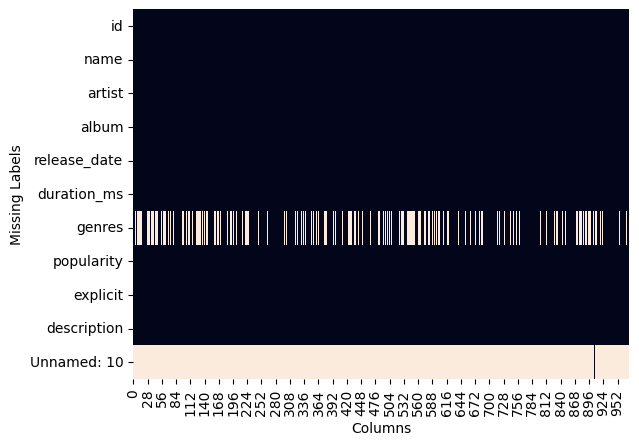

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(songs.isna().transpose(), cbar=False, ax=ax)

plt.xlabel('Columns')
plt.ylabel('Missing Labels')

plt.show()

In [6]:
songs['genres'].value_counts().reset_index().sort_values('count', ascending=False)

,genres,count
0,rap,64
1,"classic rock, psychedelic rock",28
2,"desi, hindi indie, indian indie",24
3,edm,22
4,"bollywood, desi, hindi pop, qawwali, sufi",18
...,...,...
238,"smooth jazz, soul jazz",1
239,"drum and bass, dubstep, edm, progressive house",1
240,"desi, indian indie, sufi",1
241,anti-folk,1


Lastly, since, some of my songs probably have very similar descriptions and to make organization and searching more simple, we make a new column with descriptions and song id together.

In [6]:
songs["tagged_description"] = songs[["id","description"]].astype(str).agg(" ".join, axis=1)
# this line creates a new column "tagged_description" which consists of song id and description both converted to string if needed and adds a space between the two values.

In [7]:
print(songs.head())

                       id              name  \
0  2ZzZ2qwZBWlDKs420hhloc             Maand   
1  2O0sJTtjLKvMhd7cWyNdbe          Memories   
2  5hM5arv9KDbCHS0k9uqwjr        Borderline   
3  1VVCIQHFamc5Q7uDsqDkfN          Dil Ruba   
4  0WbMK4wrZ1wFSty9F7FCgu  Good Luck, Babe!   

                                             artist             album  \
0                     Bayaan, Hasan Raheem, Rovalio             Safar   
1         Hasan Raheem, Justin Bibis, Shehryar Khan          Memories   
2                                       Tame Impala     The Slow Rush   
3  Hasan Raheem, Annural Khalid, Velo Sound Station          Dil Ruba   
4                                     Chappell Roan  Good Luck, Babe!   

  release_date  duration_ms  \
0   2024-12-12       185000   
1   2025-05-23       158333   
2   2020-02-14       237800   
3   2025-04-17       260374   
4   2024-04-05       218423   

                                              genres  popularity  explicit  \
0  desi, desi

In [9]:
songs.to_csv("dataset/final_track_list.csv", index=False)

### This is pretty much it for data preparation and exploration. We move towards actual LLM work now
